In [1]:
import os 
import pandas as pd 
import scipy.stats as stats
import numpy as np

In [2]:
current_dir = os.getcwd()

# Original Dataset 
filename = '13 million Duolingo student learning traces.csv'
filepath = os.path.normpath(os.path.join(current_dir, '../data/raw/', filename))


chunk_size = 10000
chunks = []

for chunk in pd.read_csv(filepath, chunksize=chunk_size):
    chunk.drop_duplicates(inplace=True)
    chunk.dropna(inplace=True)
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

In [3]:
# Check for na
nan_count = df.isna().sum().sum()
print(f'There are {nan_count} missing values in the dataset')

There are 0 missing values in the dataset


In [4]:
# Check for duplicates
duplicates_count = df.duplicated().sum().sum()
df.drop_duplicates(inplace=True)
print(f'There were {duplicates_count} duplicates in the dataset')

There were 0 duplicates in the dataset


<Axes: >

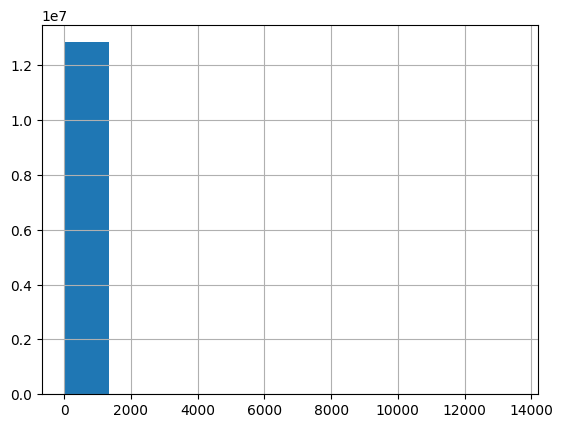

In [9]:
df['history_seen'].hist()

In [8]:
# Outlier identification 
# The only outliers we should look at is history_seen, history_correct, delta 

threshold_z = 3
df['history_seen'][(np.abs(stats.zscore(df['history_seen'])) < threshold_z)].count()


np.int64(12790181)

In [ ]:
# HISTORY SEEN OUTLIERS
# HISTORY CORRECT OUTLIERS 
# DELTA OUTLIERS 

In [23]:
print(df['history_seen'].quantile(0.9), df['history_seen'].quantile(0.99))

36.0 237.0


In [28]:
# Show rows higher than 0.9 qunatile 
# df[df['history_seen'] > 36.0] # 1 262 445 rows 

# Show rows higher than 0.99 quantile 
df[df['history_seen'] > 237].head() # 127 979 rows

# Most of the outliers are the words that are seen very frequently, because they appear in many lessons 
# These are: to be, to, we, I 

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
187,1.0,1362082533,889,u:ezFh,es,en,4bdb859f599fa07dd5eecdab0acc2d34,a/a<pr>,261,229,1,1
188,1.0,1362082533,889,u:ezFh,es,en,41ba24ffb11fd09f5fc715d39cc6c1ea,qué/qué<prn><itg><m><sg>,243,217,1,1
200,1.0,1362082533,889,u:ezFh,es,en,ab724af62c7e36266ef3b66766d47489,te/prpers<prn><pro><p2><mf><sg>,260,220,1,1
206,1.0,1362082533,443,u:ezFh,es,en,c2c8a202a12411858f87d4dcef5b2998,no/no<adv>,463,434,1,1
212,1.0,1362082533,443,u:ezFh,es,en,99cd0848be9239250ffd99e11add7338,de/de<pr>,368,330,1,1


In [34]:
len(df['user_id'].unique()) # there are 115 222 users 

115222

In [45]:
df[df['history_seen'] > 237].groupby(df['user_id']).size().sort_values(ascending=False)   # There are only 1328 users with such score 
# The biggest user with such score has 12 322 rows 

user_id
u:bcH_    12322
u:cpBu     5561
u:goA      3695
u:NPs      3221
u:bkiW     3010
          ...  
u:ih1         1
u:hG1         1
u:dDx5        1
u:dG6         1
u:zz3         1
Length: 1328, dtype: int64

In [47]:
df[df['user_id'] == 'u:bcH_']

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
193803,0.0,1362092353,61015,u:bcH_,en,es,55f383178cf0fdc463ef1ebf91bd288d,milk/milk<n><sg>,157,116,1,0
193804,1.0,1362092353,83142,u:bcH_,en,es,a5acd980d17d726d1c99e7b974d3f52d,for/for<pr>,750,481,1,1
193805,0.0,1362092353,83951,u:bcH_,en,es,9eedd98a29691237d18c127468452836,music/music<n><sg>,181,110,1,0
193806,0.0,1362092353,61191,u:bcH_,en,es,4adf5cd40d521b02a9cc241bf3adc6bb,have/have<vblex><inf>,913,583,1,0
193807,0.0,1362092353,83951,u:bcH_,en,es,b830ca5fa936b0cff94fe712d6847f29,listen/listen<vblex><pres>,93,58,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12504161,1.0,1363066201,2678082,u:bcH_,en,es,6e7589c6b19e910e6f24f8313ab231b9,these/this<prn><tn><mf><pl>,43,33,1,1
12504162,1.0,1363066201,144,u:bcH_,en,es,32d10b7ed0bea958c60a915710434dfe,can/can<vaux><pres>,1166,899,1,1
12504163,0.0,1363066201,454,u:bcH_,en,es,46a16bfbe06339264594d523fb04bf7a,restaurant/restaurant<n><sg>,470,241,1,0
12504164,0.5,1363066201,144,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,5589,3230,2,1


In [53]:
df_delta = df['delta'].to_frame()
df_delta['days'] = (df_delta['delta']/(60*60*60)).round(3)

In [57]:
df_delta['days'].quantile(0.99) # the threshold for 0.99 quantile is 52 days, whereas the max is 128 days 

np.float64(52.51)

In [ ]:
# Feature engineering 
# Interaction data between ui and learning language
df['lang_combination'] = df['ui_language'] + '-' + df['learning_language']

# Historical probability of recall  
df['h_recall'] = df['history_correct']/df['history_seen']

In [4]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1
